# Model 2D and reconstruction
### Using TomoPhantom to:
* build a phantom from the existing library of phantoms
* generate analytical sinogram from it and add noise to it
* reconstruct the noisy sinogram using the Fourier method (ToMoBAR package required).

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tomophantom import TomoP2D
import os
import tomophantom
from tomophantom.qualitymetrics import QualityTools

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 80

Text(0.5, 1.0, '2D Phantom using model no.4')

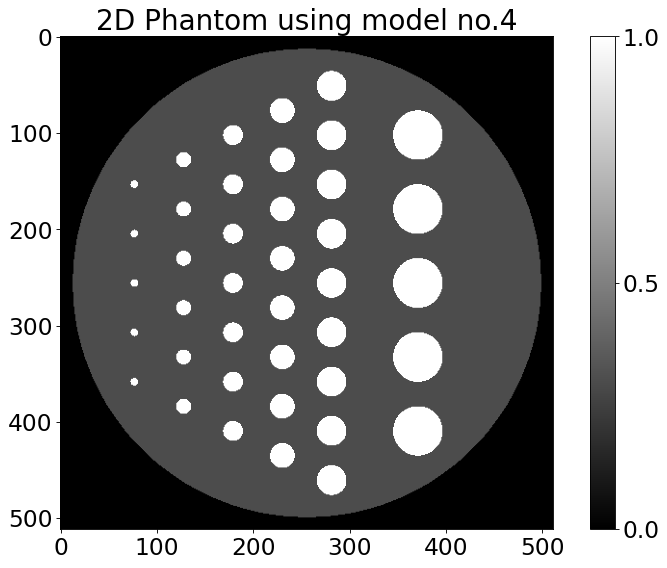

In [7]:
# generate a phantom
model = 4 # select a model
N_size = 512 # set the dimension of the phantom
path = os.path.dirname(tomophantom.__file__)
path_library2D = os.path.join(path, "phantomlib", "Phantom2DLibrary.dat")
phantom_2D = TomoP2D.Model(model, N_size, path_library2D)

plt.figure(1)
plt.rcParams.update({'font.size': 21})
plt.imshow(phantom_2D, vmin=0, vmax=1, cmap="gray")
plt.colorbar(ticks=[0, 0.5, 1], orientation='vertical')
plt.title('{}''{}'.format('2D Phantom using model no.',model))

Text(0.5, 1.0, 'Analytical sinogram of model no.4')

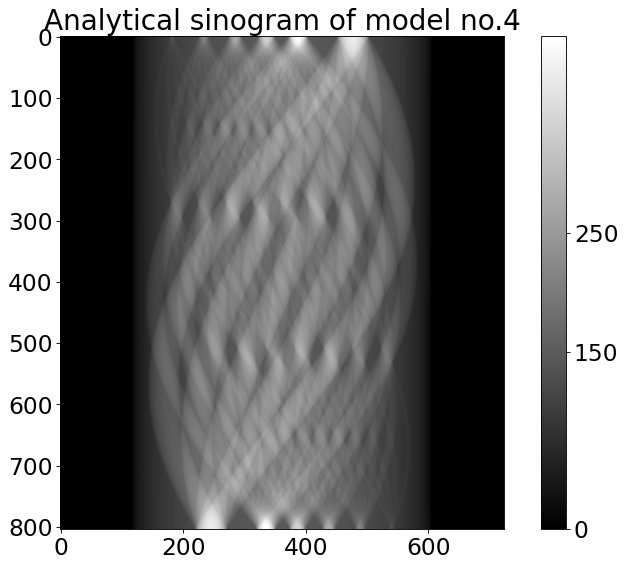

In [8]:
# generate analytical sinogram 
angles_num = int(0.5*np.pi*N_size); # angles number
angles = np.linspace(0.0,179.9,angles_num,dtype='float32')
angles_rad = angles*(np.pi/180.0)
P = int(np.sqrt(2)*N_size) #detectors

sino_an = TomoP2D.ModelSino(model, N_size, P, angles, path_library2D)

plt.figure(2)
plt.rcParams.update({'font.size': 21})
plt.imshow(sino_an,  cmap="gray")
plt.colorbar(ticks=[0, 150, 250], orientation='vertical')
plt.title('{}''{}'.format('Analytical sinogram of model no.',model))

Poisson noise has been added to the data.


Text(0.5, 1.0, 'Analytical noisy sinogram.4')

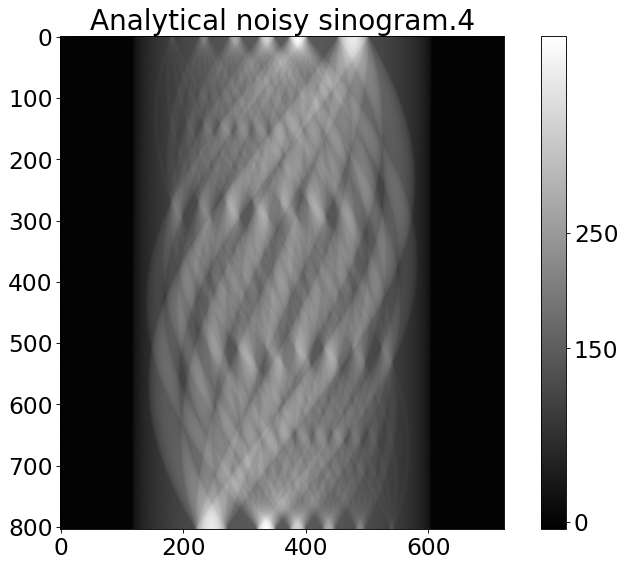

In [9]:
# Adding some noise to data
from tomophantom.artefacts import artefacts_mix

_noise_ =  {'noise_type' : 'Poisson',
            'noise_sigma' : 10000, # noise amplitude
            'noise_seed' : 0}

noisy_sino = artefacts_mix(sino_an, **_noise_)

plt.figure()
plt.rcParams.update({'font.size': 21})
plt.imshow(noisy_sino,cmap="gray")
plt.colorbar(ticks=[0, 150, 250], orientation='vertical')
plt.title('{}''{}'.format('Analytical noisy sinogram.',model))

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Reconstructing analytical sinogram using Fourier Slice method
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


Text(0.5, 1.0, 'Fourier slice reconstruction')

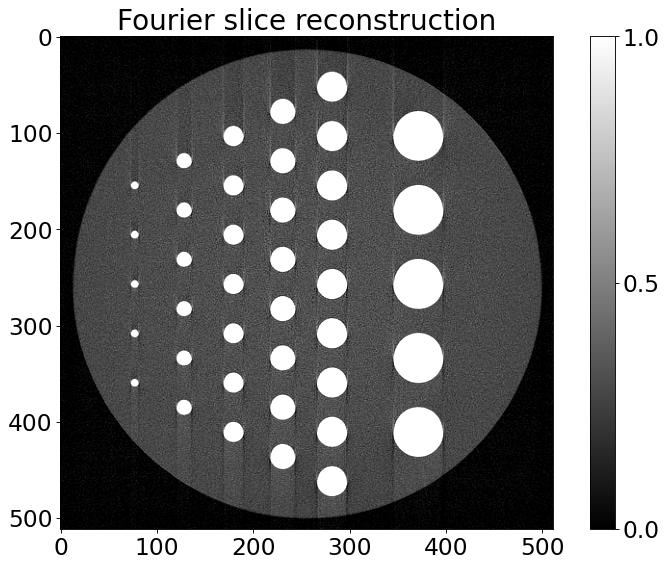

In [12]:
# one can use a ToMoBAR package to reconstruct the data
# install it with: conda install httomo::tomobar

# initialise tomobar DIRECT reconstruction class ONCE
from tomobar.methodsDIR import RecToolsDIR

RectoolsDIR = RecToolsDIR(DetectorsDimH = P,  # DetectorsDimH # detector dimension (horizontal)
                    DetectorsDimV = None,  # DetectorsDimV # detector dimension (vertical) 
                    CenterRotOffset = None, # Centre of Rotation (CoR) scalar 
                    AnglesVec = angles_rad, # array of angles in radians
                    ObjSize = N_size, # a scalar to define reconstructed object dimensions
                    device_projector='cpu')
print ("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print ("Reconstructing analytical sinogram using Fourier Slice method")
print ("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
RecFourier = RectoolsDIR.FOURIER(noisy_sino, method='linear') 
plt.figure() 
plt.imshow(RecFourier, vmin=0, vmax=1, cmap="gray")
plt.colorbar(ticks=[0, 0.5, 1], orientation='vertical')
plt.title('Fourier slice reconstruction')